In [9]:
import matplotlib.pyplot as plt 
import pandas as pd

In [10]:
df = pd.read_csv("Untitled spreadsheet - somalia-acute-malnutrition.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

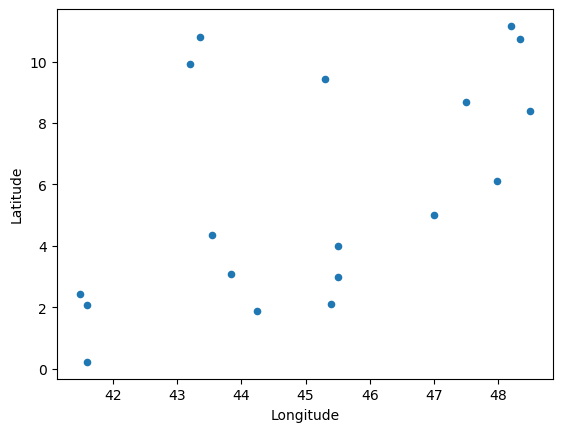

In [11]:
df.plot(kind="scatter", x="Longitude" , y="Latitude", )
plt.show


In [12]:
df.head()

,Region,Children 6-59 months,Moderate Acute Malnutrition,Severer Acute Malnutrition,Global Malnutrition,Longitude,Latitude
0,Awdal,"127,222","28,560","12,170","40,730",43.3512,10.8005
1,Bakool,"108,674","45,900","21,300","67,200",43.5432,4.3412
2,Banadir,"634,278","238,550","76,740","315,290",45.4000,2.1167
3,Bari,"246,446","67,970","13,110","81,080",48.2000,11.1578
4,Bay,"249,595","100,620","55,630","156,250",43.8345,3.0713


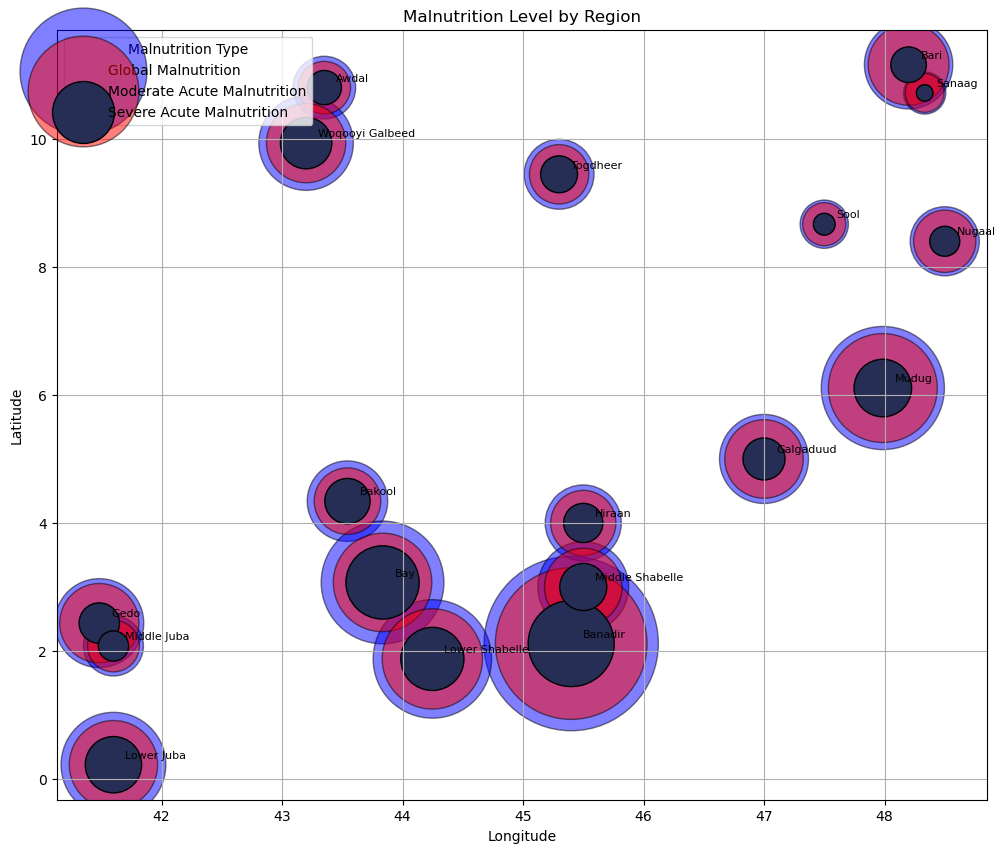

In [13]:
for col in [
    'Moderate Acute Malnutrition',
    'Severer Acute Malnutrition',
    'Global Malnutrition'
]:
    df[col] = df[col].astype(str).str.replace(',','')
    df[col] = pd.to_numeric(df[col], errors= 'coerce').fillna(0)

scaling_factor = 0.05
df['Acute_size'] = df['Moderate Acute Malnutrition'] * scaling_factor
df['severe_size'] = df['Severer Acute Malnutrition'] * scaling_factor
df['global_size'] = df['Global Malnutrition'] * scaling_factor

plt.figure(figsize=(12,10))

plt.scatter(df['Longitude'], df['Latitude'], s=df['global_size'], c='blue', alpha=0.5,
            label='Global Malnutrition', edgecolors='black')
plt.scatter(df['Longitude'], df['Latitude'], s=df['Acute_size'], c='red', alpha=0.5,
            label='Moderate Acute Malnutrition', edgecolors='black')
plt.scatter(df['Longitude'], df['Latitude'], s=df['severe_size'], c='#272e55', alpha=1,
            label='Severe Acute Malnutrition', edgecolors='black')


for _, row in df.iterrows():
    plt.text(row['Longitude'] + 0.1, row['Latitude']+ 0.1, row['Region'],fontsize=8)

plt.grid(True)
plt.title('Malnutrition Level by Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Malnutrition Type')

plt.show()    